In [1]:
%matplotlib inline

In [2]:
# Checking home folder
import os
print(os.path.expanduser("~"))

C:\Users\rmart


In [3]:
# To start with, we load up the Numpy and csv libraries that we will need for the code
import numpy as np
import csv
data_filename = "C:/Users/rmart/OneDrive/Desktop/Pace/CS619/Chapter02/data/ionosphere.data"
print(data_filename)

C:/Users/rmart/OneDrive/Desktop/Pace/CS619/Chapter02/data/ionosphere.data


In [4]:
# Creating X and Y Numpy arrays to store dataset in
x = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

In [5]:
# Using csv module to load the file
# Import it and set up a csv reader object, then loop through the file
# Then set the row in x and class value in y for every line in the dataset
with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        
        # Set the appropriate row in our dataset
        x[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'

In [6]:
# Creating training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=14)

In [7]:
# Checking the shape of sets
print(f'There are {x_train.shape[0]} samples in the training set')
print(f'There are {x_train.shape[1]} features in the training set')
print(f'There are {x_test.shape[0]} samples in the testing set')
print(f'There are {x_test.shape[1]} features in the testing set')

There are 263 samples in the training set
There are 34 features in the training set
There are 88 samples in the testing set
There are 34 features in the testing set


In [8]:
# Then import the nearest neighbor class and create an instance for it
# Parameters as defaults for now
# By default, algorithm will choose the five nearest neighbors to predict the class of a testing sample
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

In [9]:
# After creating the estimator, we must fit it in our training dataset
estimator.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
# Then we train the algorithm with our test set and evaluate with our testing set
y_predicted = estimator.predict(x_test)
accuracy = np.mean(y_test == y_predicted) * 100
print(f'The accuracy is {accuracy:.1f}%')

The accuracy is 86.4%


In [11]:
# The scikit-learn library contains a few cross-fold validation methods
from sklearn.model_selection import cross_val_score

# Using this new function to evaluate our model using cross-fold validation
scores = cross_val_score(estimator, x, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print(f'The average accuracy is {average_accuracy:.1f}%')

The average accuracy is 82.6%


In [12]:
# Investigating the impact of parameter on performance by testing a number of values for the n_neighbors parameter
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))    # 20 is included
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, x, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

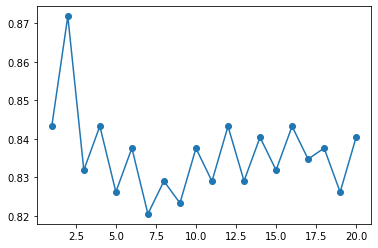

In [13]:
# Plotting the relationship between the value of n_neighbors and the accuracy
from matplotlib import pyplot as plt
plt.plot(parameter_values, avg_scores, '-o')

In [14]:
# Testing 100 parameter_values to check variance
new_avg_scores = []
new_all_scores = []
new_parameter_values = list(range(1, 101))    # 100 is included
for n_neighbors in new_parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    new_scores = cross_val_score(estimator, x, y, scoring='accuracy')
    new_avg_scores.append(np.mean(new_scores))
    new_all_scores.append(new_scores)

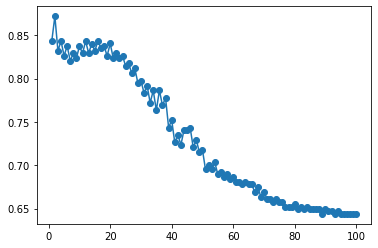

In [15]:
# Plotting new parameter values alongside average scores
plt.plot(new_parameter_values, new_avg_scores, '-o')

In [16]:
# Dealing with features problem in range through breaking dataset
# First we create a copy of the array so we don't alter the original one
x_broken = np.array(x)

# Next we break the dataset by dividing every second feature by 10
x_broken[:,::2] /= 10

In [17]:
# Checking the effect of that by computing the accuracy
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, x, y, scoring='accuracy')
print(f'The original average accuracy for is {np.mean(original_scores)*100:.1f}%')
broken_scores = cross_val_score(estimator, x_broken, y, scoring='accuracy')
print(f'The \'broken\' average accuracy for is {np.mean(broken_scores)*100:.1f}%')

The original average accuracy for is 82.6%
The 'broken' average accuracy for is 73.8%


In [18]:
# Pre-processing feature-based normalization
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Running the transform function to pre-processor
x_transformed = MinMaxScaler().fit_transform(x)
# x_transformed will have same shape as x yet each column will have a max of 1 and min of 0
print(x_transformed)

[[1.       0.       0.997695 ... 0.227565 0.593205 0.2735  ]
 [1.       0.       1.       ... 0.46856  0.43131  0.487765]
 [1.       0.       1.       ... 0.3791   0.780225 0.30881 ]
 ...
 [1.       0.       0.973505 ... 0.50221  0.963485 0.497115]
 [1.       0.       0.95304  ... 0.481215 0.937015 0.418785]
 [1.       0.       0.92355  ... 0.46661  0.92882  0.469245]]


In [20]:
# Creating a workflow by combining the code from previous sections
x_transformed = MinMaxScaler().fit_transform(x_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, x_transformed, y, scoring='accuracy')
print(f'The average accuracy for is {np.mean(transformed_scores)*100:.1f}%')

The average accuracy for is 82.9%


In [21]:
# Using pipelines to expect an estimator
from sklearn.pipeline import Pipeline

scaling_pipeline = Pipeline([('scale', MinMaxScaler()), ('predict', KNeighborsClassifier())])

In [22]:
# Testing pipeline using cross-validation code from before
scores = cross_val_score(scaling_pipeline, x_broken, y, scoring='accuracy')
print(f'The pipeline scored an average accuracy for is {np.mean(transformed_scores)*100:.1f}%')

The pipeline scored an average accuracy for is 82.9%
